<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import chardet
import csv

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [4]:
df_hh = pd.read_csv('/content/drive/MyDrive/dst-3.0_16_1_hh_database.csv', sep=';', encoding='utf-8')

In [5]:
df_hh.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [6]:
df_hh.shape

(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [7]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [ ]:
df_hh.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

4. Обратите внимание на информацию о числе непустых значений.

In [ ]:
(df_hh.isnull().sum() != 0).sum()

3

5. Выведите основную статистическую информацию о столбцах.


In [8]:
df_hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
df_hh['Образование'] = df_hh['Образование и ВУЗ'].apply(lambda x: ' '.join(x.split()[:2]))
df_hh['Образование'].unique()


array(['Неоконченное высшее', 'Высшее образование', 'Среднее специальное',
       'Среднее образование'], dtype=object)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
df_hh['Пол'] = df_hh['Пол, возраст'].apply(lambda x: x[0])
df_hh['Пол'].value_counts(normalize=True)

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64

In [11]:
df_hh['Возраст'] = df_hh['Пол, возраст'].apply(lambda x: x.split(',')[1])
df_hh['Возраст'] = df_hh['Возраст'].apply(lambda x: int(x.split()[0]))
df_hh['Возраст'].mean().round(1)

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
df_hh['Опыт работы в мес.'] = df_hh['Опыт работы'].apply(lambda x: np.nan if x == 'Не указано' else (x.split()[2:5] if isinstance(x, str) == True else np.nan))
df_hh['Опыт работы в мес.'].isna().sum()

170

In [13]:
# ф-ция для преобразования опыта работы в месяцы
def exp(x) -> int:
  if x != x:
    return x

  else:
    count_month = 0

    if x[1].startswith("л") or x[1].startswith("г"):
      count_month += int(x[0]) * 12

    elif x[1].startswith("м"):
      count_month += int(x[0])

    try:
      int(x[2])
    except ValueError:
      count_month += 0
    else:
      count_month += int(x[2])

    return count_month

In [14]:
df_hh['Опыт работы в мес.'] = df_hh['Опыт работы в мес.'].apply(exp)
df_hh['Опыт работы в мес.'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [15]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

# ф-ция для преобразования списка городов в категории
def city(x: str):
  if x == 'Москва' or x == 'Санкт-Петербург':
    return x
  elif x in million_cities:
    return 'город-миллионник'
  else:
    return 'другие'

In [16]:
df_hh['Город'] = df_hh['Город, переезд, командировки'].apply(lambda x: x.split()[0])
df_hh['Город'] = df_hh['Город'].apply(city)
df_hh['Город'].value_counts(normalize=True)

Москва              0.371469
другие              0.367692
город-миллионник    0.150501
Санкт-Петербург     0.110339
Name: Город, dtype: float64

In [17]:
# ф-ция для преобразования информации о командировках
def business_trip(x: str):
  if 'командиров' not in x:
    return False
  elif 'не готов' in x:
    return False
  else:
    return True

In [18]:
# ф-ция для преобразования информации о переезде
def moving(x: str):
  if 'перее' not in x:
    return False
  elif 'не готов' in x:
    return False
  else:
    return True

In [19]:
df_hh['Готовность к переезду'] = df_hh['Город, переезд, командировки'].apply(lambda x: x.split(',')[-2])
df_hh['Готовность к командировкам'] = df_hh['Город, переезд, командировки'].apply(lambda x: x.split(',')[-1])
df_hh['Готовность к переезду'] = df_hh['Город, переезд, командировки'].apply(moving)
df_hh['Готовность к командировкам'] = df_hh['Город, переезд, командировки'].apply(business_trip)

In [20]:
df_hh['Готовность и к переезду, и к командировкам'] = df_hh['Готовность к переезду'] & df_hh['Готовность к переезду']
df_hh['Готовность и к переезду, и к командировкам'].value_counts(normalize=True)

False    0.679644
True     0.320356
Name: Готовность и к переезду, и к командировкам, dtype: float64

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [21]:
df_hh['полная занятость'] = df_hh['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
df_hh['частичная занятость'] = df_hh['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
df_hh['проектная работа'] = df_hh['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
df_hh['стажировка'] = df_hh['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
df_hh['волонтёрство'] = df_hh['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)

In [22]:
df_hh['гибкий график'] = df_hh['График'].apply(lambda x: True if 'гибкий график' in x else False)
df_hh['полный день'] = df_hh['График'].apply(lambda x: True if 'полный день' in x else False)
df_hh['удаленная работа'] = df_hh['График'].apply(lambda x: True if 'удаленная работа' in x else False)
df_hh['сменный график'] = df_hh['График'].apply(lambda x: True if 'сменный график' in x else False)
df_hh['вахтовый метод'] = df_hh['График'].apply(lambda x: True if 'вахтовый метод' in x else False)

In [23]:
(df_hh['проектная работа']).value_counts()

False    36676
True      8068
Name: проектная работа, dtype: int64

In [24]:
(df_hh['волонтёрство']).value_counts()

False    44258
True       486
Name: волонтёрство, dtype: int64

In [25]:
(df_hh['волонтёрство'] & df_hh['проектная работа']).value_counts()

False    44308
True       436
dtype: int64

In [26]:
(df_hh['вахтовый метод'] & df_hh['гибкий график']).value_counts()

False    42433
True      2311
dtype: int64

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [28]:
# загружаем датафрейм с курсами валют
df_cur = pd.read_csv('/content/ExchangeRates.zip')

In [29]:
df_cur.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1


In [30]:
# преобразуем дату
df_cur['date'] = pd.to_datetime(df_cur['date']).dt.date
# посмотрим какие валюты есть
df_cur['currency'].unique()

array(['USD', 'EUR', 'KZT', 'KGS', 'BYN', 'UAH', 'UZS', 'AZN'],
      dtype=object)

In [31]:
df_hh['reload_date'] = pd.to_datetime(df_hh['Обновление резюме']).dt.date
df_hh['salary'] = df_hh['ЗП'].apply(lambda x: x.split()[0])
df_hh['currency'] = df_hh['ЗП'].apply(lambda x: x.split()[-1][:3].replace(' ', ''))

# посмотрим какие валюты есть в основном датафрейме
df_hh['currency'].unique()

array(['руб', 'бел', 'KZT', 'EUR', 'USD', 'грн', 'сум', 'KGS', 'AZN'],
      dtype=object)

In [32]:
# создадим словарь для преобразование названий валют в мировой стандарт
currency_dict = {
                'руб': 'RUB',
                'грн'	: 'UAH',
                'USD': 'USD',
                'EUR': 'EUR',
                'бел' : 'BYN',
                'сум' : 'UZS',
                'AZN': 'AZN',
                'KZT': 'KZT',
                'KGS': 'KGS'
}

In [81]:
# применим наш словарь валют
df_hh['currency'] = df_hh['currency'].map(currency_dict)
df_hh['currency'].unique()

# создадим 2 датафрейма: с ЗП в рублях и с ЗП в других валютах
df_hh_rub = df_hh.loc[df_hh['currency'] == 'RUB']
df_hh_not_rub = df_hh.loc[df_hh['currency'] != 'RUB']

# дополним датафрейм с ЗП не в рублях курсами валют
df_hh_not_rub_calc = df_hh_not_rub.merge(df_cur, left_on=['reload_date', 'currency'], right_on=['date','currency'])

# дополним датафрейм с ЗП в рублях единицами, т.к. считаем суммарно в рублях
df_hh_rub['close'] = 1
df_hh_rub['proportion'] = 1

# приводим датафреймы к общему шаблону
df_hh_not_rub_calc = df_hh_not_rub_calc.drop(['per', 'time'], axis=1)

# объединяем датафреймы в рублях и в других валютах
df_calc = pd.concat([df_hh_rub, df_hh_not_rub_calc], axis =0, ignore_index=True)

# смотрим что получилось
df_calc.tail()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,...,удаленная работа,сменный график,вахтовый метод,reload_date,salary,currency,close,proportion,date,vol
1846,"Мужчина , 22 года , родился 26 апреля 1996",1000 USD,"Data Scientist, python/javascript разработчик","Симферополь , хочу переехать , готов к команди...",полная занятость,полный день,"Опыт работы 2 года 4 месяца Data Scientist, p...",Decision Mapper,Data Scientist,Высшее образование 2019 Таврический националь...,...,False,False,False,2018-07-30,1000,USD,62.9726,1,2018-07-30,0.0
1847,"Мужчина , 36 лет , родился 2 января 1983",3158 USD,"Ведущий специалист, администратор баз данных P...","Москва , м. Динамо , готов к переезду (Минск)...",полная занятость,"полный день, удаленная работа",Опыт работы 13 лет 3 месяца Ведущий специалис...,"Газпромбанк, ОАО","Ведущий специалист, администратор баз данных","Высшее образование 2012 МГУГиК, Москва КФ, ИНЖ...",...,True,False,False,2019-08-02,3158,USD,66.0199,1,2019-08-02,0.0
1848,"Мужчина , 35 лет , родился 14 июля 1983",5905 EUR,Архитектор программного обеспечения,"Москва , м. Речной вокзал , не готов к переез...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 12 лет 10 месяцев Архитектор прог...,Аутсорсинг,Архитектор программного обеспечения,Среднее специальное образование 2018 Московск...,...,True,True,False,2018-10-24,5905,EUR,74.8584,1,2018-10-24,0.0
1849,"Мужчина , 31 год , родился 4 ноября 1987",3800 USD,Team Lead/Senior разработчик,"Москва , м. Первомайская , не готов к переезд...","проектная работа, полная занятость","гибкий график, полный день",Опыт работы 14 лет 6 месяцев Team Lead/Senior...,Айти и Право,Team-Lead,Высшее образование 2009 Башкирский государстве...,...,False,False,False,2019-11-03,3800,USD,65.9646,1,2019-11-03,0.0
1850,"Мужчина , 25 лет , родился 22 декабря 1993",1500 USD,Программист-разработчик,"Москва , м. Каширская , готов к переезду (США...","стажировка, частичная занятость, проектная раб...","полный день, удаленная работа",Опыт работы 1 год 4 месяца Программист-разраб...,НИЯУ МИФИ,Ассистент,Высшее образование (Магистр) 2017 Национальны...,...,True,False,False,2018-08-27,1500,USD,67.7911,1,2018-08-27,0.0


In [34]:
# проверяем размерность получившегося датафрейма
df_calc.shape

(44744, 37)

In [35]:
# считаем медианную ЗП в рублях среди всех резюме
df_calc['ЗП (руб)'] = df_calc['salary'].astype(int) * df_calc['close'] / df_calc['proportion']
df_calc['ЗП (руб)'].median()

59019.0

In [36]:
# удаляем лишние столобцы
df_calc = df_calc.drop(['Пол, возраст', 'ЗП', 'Занятость', 'График', 'reload_date', 'salary', 'currency', 'close', 'proportion', 'date', 'vol',
                        'Город, переезд, командировки', 'Опыт работы', 'Готовность и к переезду, и к командировкам', 'Образование и ВУЗ'], axis=1)

# проверяем
df_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы в мес.               44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

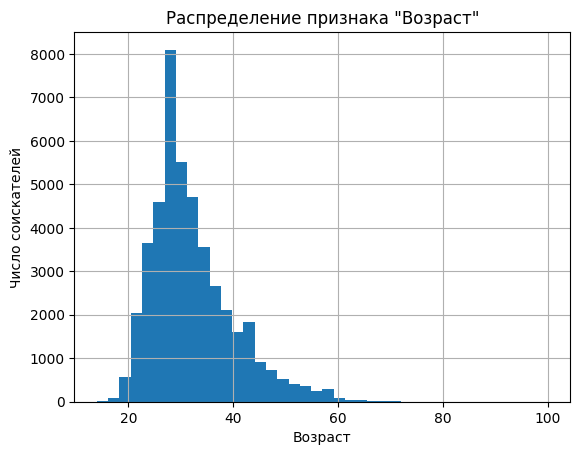

In [37]:
df_calc['Возраст'].hist(bins=40)

plt.title('Распределение признака "Возраст"')
plt.xlabel('Возраст')
plt.ylabel('Число соискателей')

style.use('ggplot')
plt.show()

In [38]:
df_calc['Возраст'].mode()

0    30
Name: Возраст, dtype: int64

### На гистограмме видно, что больше всего соикателей от 21 до 40 лет, мода 30 лет, минимальный возраст 17 лет, максимальный около 60 лет. Есть аномалии, что работу ищут несовершеннолетние и пожилые 70+.



2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

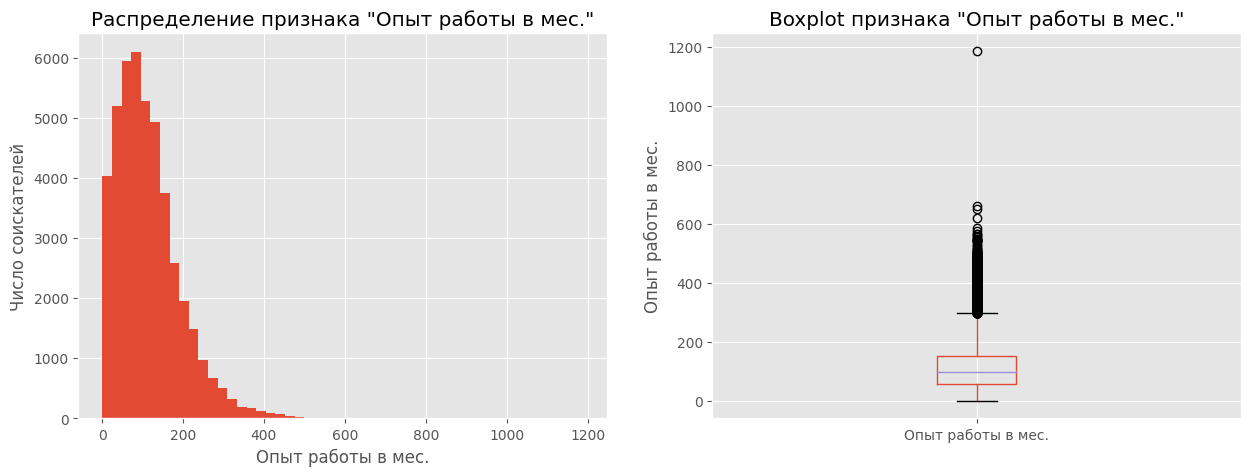

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df_calc['Опыт работы в мес.'].hist(bins=50)

plt.title('Распределение признака "Опыт работы в мес."')
plt.xlabel('Опыт работы в мес.')
plt.ylabel('Число соискателей')

plt.subplot(1,2,2)
df_calc.boxplot(column=['Опыт работы в мес.'], by=None)
plt.title('Boxplot признака "Опыт работы в мес."')
plt.xlabel('')
plt.ylabel('Опыт работы в мес.')

style.use('ggplot')
plt.show()

In [40]:
df_calc['Опыт работы в мес.'].mode()

0    81.0
Name: Опыт работы в мес., dtype: float64

In [41]:
df_calc['Опыт работы в мес.'].median()

100.0

In [42]:
df_calc['Опыт работы в мес.'].mean().round()

114.0

### На гистограмме видно, что больше всего соикателей c с опытом около 100 меc. мода 81 мес., есть выбросы с аномально большим опытом работы. Много соискателей без опыта.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


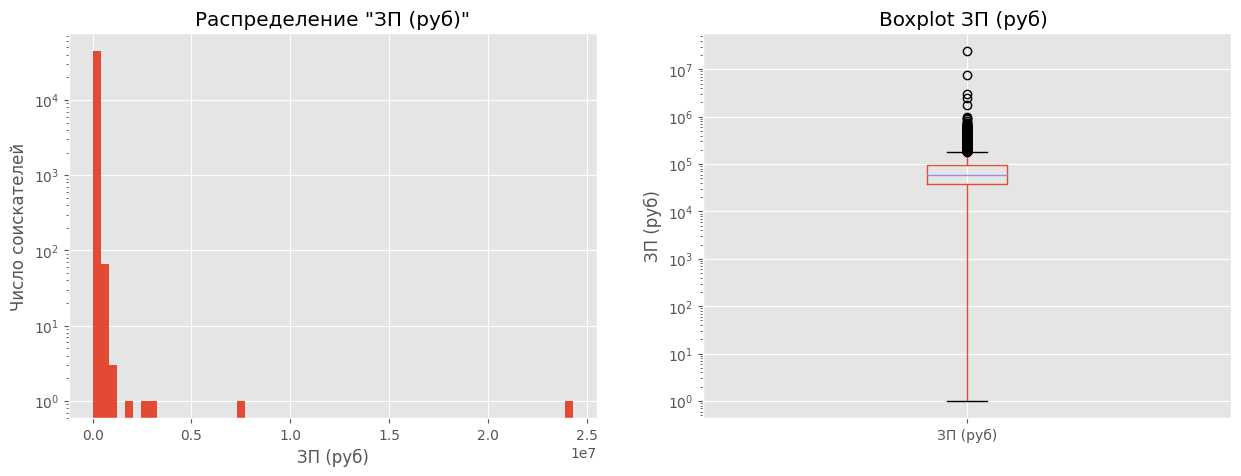

In [64]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df_calc['ЗП (руб)'].hist(bins=60)

plt.semilogy()
plt.title('Распределение "ЗП (руб)"')
plt.xlabel('ЗП (руб)')
plt.ylabel('Число соискателей')

plt.subplot(1,2,2)
df_calc.boxplot(column=['ЗП (руб)'], by=None)
plt.semilogy()
plt.title('Boxplot ЗП (руб) ')
plt.xlabel('')
plt.ylabel('ЗП (руб)')

style.use('ggplot')
plt.show()

### Большинство кандидатов ищет ЗП до 100 тыс. рублей, скорее всего это кандидаты с небольшим опытом, которых большинство. Кандидаты высокого уровня, ищут ЗП от 100тыс. до 1 млн, присутствуют условные выбросы с ожиданием ЗП свыше 1 млн. Много соискателей не указывает желаемую ЗП, либо указывает огромную, поэтому гистограмма получилась плохо читаемая.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [44]:
# удаляем выбросы
df_clear = df_calc.loc[df_calc['ЗП (руб)'] < 1e6].copy()

In [45]:
# считаем медианы
median_salary = np.array([df_clear['ЗП (руб)'].loc[df_clear['Образование'] == 'Высшее образование'].median(),
                         df_clear['ЗП (руб)'].loc[df_clear['Образование'] == 'Неоконченное высшее'].median(),
                         df_clear['ЗП (руб)'].loc[df_clear['Образование'] == 'Среднее специальное'].median(),
                          df_clear['ЗП (руб)'].loc[df_clear['Образование'] == 'Среднее образование'].median()])
education = ['Высшее образование', 'Неоконченное высшее', 'Среднее специальное', 'Среднее образование']

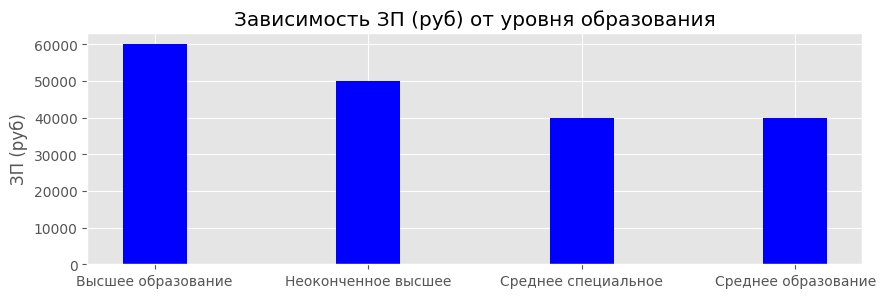

In [46]:
plt.figure(figsize=(10,3))
style.use('ggplot')
plt.title('Зависимость ЗП (руб) от уровня образования')
plt.xlabel('')
plt.ylabel('ЗП (руб)')

plt.bar(education, median_salary, width=0.3, color='blue')
plt.show()

### Видно, что чем выше образование, тем выше ожидаемая ЗП.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [67]:
# считаем медианы
median_salary_city = np.array([df_clear['ЗП (руб)'].loc[df_clear['Город'] == 'Москва'].median(),
                         df_clear['ЗП (руб)'].loc[df_clear['Город'] == 'Санкт-Петербург'].median(),
                         df_clear['ЗП (руб)'].loc[df_clear['Город'] == 'город-миллионник'].median(),
                          df_clear['ЗП (руб)'].loc[df_clear['Город'] == 'другие'].median()])

cities = ['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие']

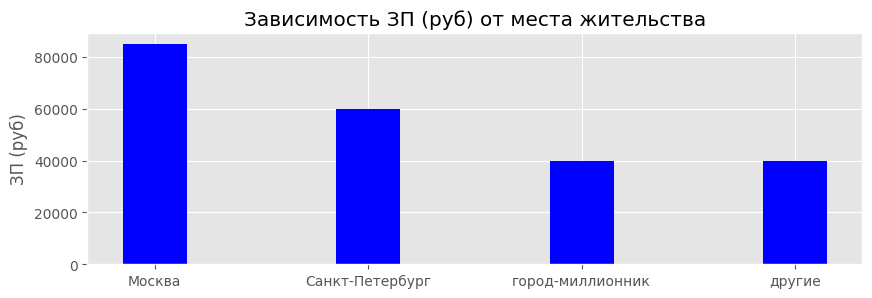

In [69]:
plt.figure(figsize=(10,3))
style.use('ggplot')
plt.title('Зависимость ЗП (руб) от места жительства')
plt.xlabel('')
plt.ylabel('ЗП (руб)')

plt.bar(cities, median_salary_city, width=0.3, color='blue')
plt.show()

### В лидерах по ожидаемой ЗП Москва, на втором месте Санкт-Петербург, остальные города уступают по ожиданиям ЗП.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [48]:
# считаем медианы
move_salary = np.array([df_clear['ЗП (руб)'].loc[df_clear['Готовность к переезду'] == True].median(),
                         df_clear['ЗП (руб)'].loc[df_clear['Готовность к переезду'] == False].median()])

trip_salary = np.array([df_clear['ЗП (руб)'].loc[df_clear['Готовность к командировкам'] == True].median(),
                          df_clear['ЗП (руб)'].loc[df_clear['Готовность к командировкам'] == False].median()])
cat = ['готовы', 'не готовы']

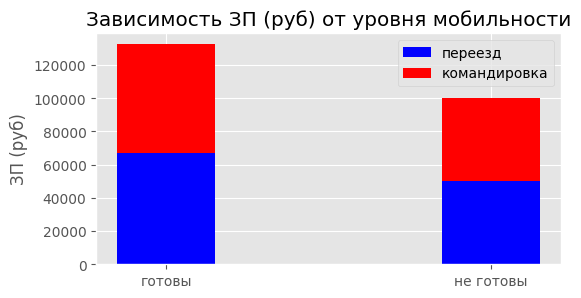

In [82]:
plt.figure(figsize=(6,3))
style.use('ggplot')
plt.title('Зависимость ЗП (руб) от уровня мобильности')
plt.xlabel('')
plt.ylabel('ЗП (руб)')

plt.bar(cat, move_salary, width=0.3, color='blue', label='переезд')
plt.bar(cat, trip_salary , width=0.3, color='red', bottom=move_salary, label='командировка')
plt.legend()
plt.show()

### Как видно, кандидаты, имеющие возможности к переезду или к командировкам ожидают большую оплату труда.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [50]:
hm = pd.pivot_table(df_clear, values=['ЗП (руб)'], index=['Образование'], columns=['Возраст'], aggfunc='median')

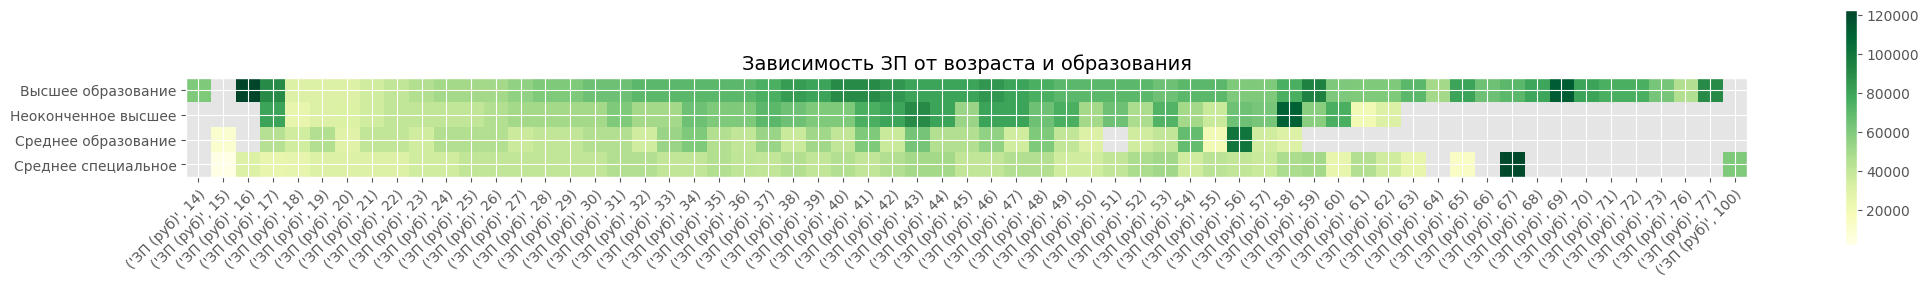

In [51]:
fig, ax = plt.subplots(figsize=(20,5))
style.use('ggplot')
im = ax.imshow(hm, cmap="YlGn")

cbar = ax.figure.colorbar(im,
                          ax = ax,
                          shrink=0.5 )

ax.set_title("Зависимость ЗП от возраста и образования", size=14)

fig.tight_layout()

educations = hm.index.values
ages = hm.columns.values

# Add axis tick labels
ax.set_xticks(np.arange(len(ages)),
              labels=ages)
ax.set_yticks(np.arange(len(educations)),
              labels=educations)

# Rotate the tick labels to be more legible
plt.setp(ax.get_xticklabels(),
         rotation = 45,
         ha = "right",
         rotation_mode = "anchor")
plt.show()

### Самые высокие ЗП просят специалисты с Высшим образованием, наблюдается рост ЗП в данной категории от 20 к 40 годам, потом идет небольшой спад с возрастом. Наблюдаем выбросы возрасте 14-17 лет и 100 лет, скорее всего это некорректные данные. Также видно, что специалисты со средним образованием раньше уходят с рынка труда по возрасту.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

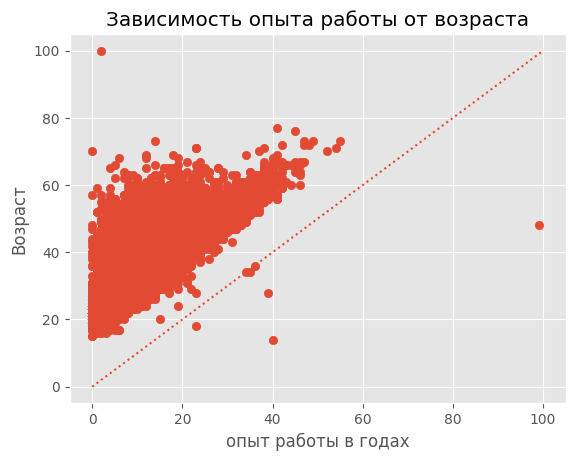

In [52]:
df_clear['опыт работы в годах'] = (df_clear['Опыт работы в мес.']/12).round()

plt.scatter(df_clear['опыт работы в годах'], df_clear['Возраст'])
style.use('ggplot')
plt.xlabel("опыт работы в годах")
plt.ylabel("Возраст")
plt.title("Зависимость опыта работы от возраста")

x = [0, 100]
y = [0, 100]
plt.plot(x, y, linestyle = 'dotted')

plt.show()



### Видим 9 точек явных выбросов, но в целом опыт работы достаточно сильно положительно коррелирует с возрастом. Центр распределения - кандидаты около 40 лет с опытом 15 лет. Без опыта присутсвуют кандидаты всех возрастов.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [70]:
# считаем медианы
sex_salary = np.array([df_clear['ЗП (руб)'].loc[df_clear['Пол'] == 'М'].median(),
                         df_clear['ЗП (руб)'].loc[df_clear['Пол'] == 'Ж'].median()])

sex = ['М', 'Ж']

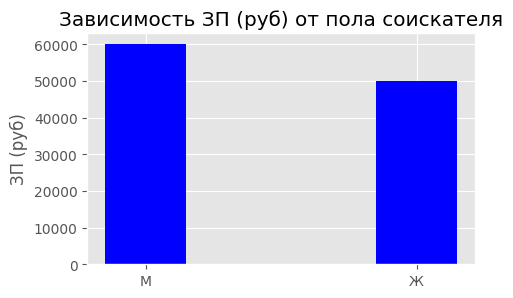

In [74]:
plt.figure(figsize=(5,3))
style.use('ggplot')
plt.title('Зависимость ЗП (руб) от пола соискателя')
plt.xlabel('')
plt.ylabel('ЗП (руб)')

plt.bar(sex, sex_salary, width=0.3, color='blue')
plt.show()

###Женщины имеют меньшие требования по оплате труда.

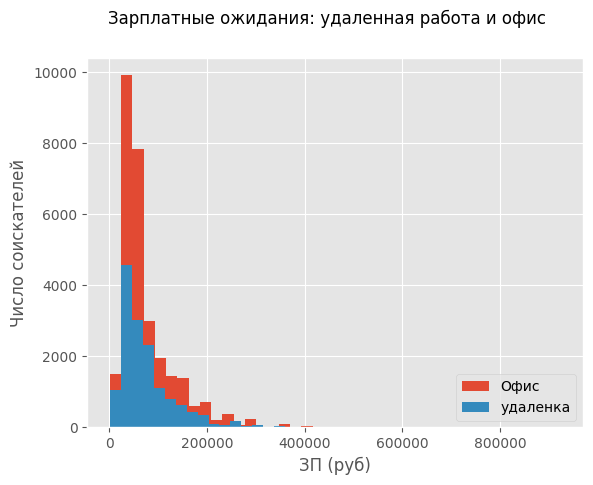

In [79]:
df_office = df_clear.loc[df_clear['удаленная работа'] == False].copy()
df_home_work = df_clear.loc[df_clear['удаленная работа'] == True].copy()

fig, axs = plt.subplots()
fig.suptitle('Зарплатные ожидания: удаленная работа и офис')
style.use('ggplot')

plt.hist(df_office['ЗП (руб)'], bins=40)
plt.hist(df_home_work['ЗП (руб)'], bins=40)

# Function add a legend
plt.legend(["Офис", "удаленка"], loc ="lower right")

plt.ylabel("Число соискателей")
plt.xlabel('ЗП (руб)')

plt.show()

###Можно сделать вывод, что при работе только в офисе кандидаты обычно требуют большую ЗП. В целом высоких зарплат требуют мало соискателей, в основном запросы до 200 тыс. рублей. Очень много кандидатов (видимо без опыта) готовы работать практически бесплатно (пик около нуля).

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [55]:
df_clear['Обновление резюме'] = pd.to_datetime(df_clear['Обновление резюме']).dt.date
df_clear.duplicated(keep='last').sum()
df_clear = df_clear.drop_duplicates(keep=False)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [56]:
df_clear.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы в мес.                 166
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтёрство                         0
гибкий график                        0
полный день                          0
удаленная работа                     0
сменный график                       0
вахтовый метод                       0
ЗП (руб)                             0
опыт работы в годах                166
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [57]:
df_clear = df_clear.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [58]:
df_clear = df_clear.drop(df_clear.loc[(df_clear['ЗП (руб)'] > 1e6) | (df_clear['ЗП (руб)'] < 1e3)].index)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [59]:
df_clear = df_clear.drop(df_clear.loc[df_clear['Опыт работы в мес.']/12 > df_clear['Возраст']].index)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [60]:
df_clear['stats_ages'] = stats.zscore(np.log(df_clear['Возраст']))
df_clear.loc[(df_clear['stats_ages'] > 4) | (df_clear['stats_ages'] < -3) ].value_counts().sum()

3

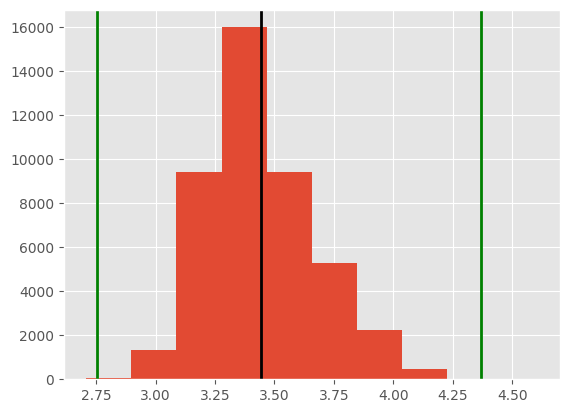

In [61]:
ages = df_clear['Возраст']

plt.axvline(np.log(ages).mean(), color='k', lw=2)
plt.axvline(np.log(ages).mean() + np.log(ages).std()*4, color='g', lw=2)
plt.axvline(np.log(ages).mean() - np.log(ages).std()*3, color='g', lw=2)
style.use('ggplot')
np.log(ages).hist()

plt.show()


In [62]:
min_age = np.exp(2.75)
max_age = np.exp(4.375)
min_age.round(), max_age.round()

(16.0, 79.0)

### По методу 4 сигм вправо и 3 сигм влево выбросами считаем возраста соответсвенно: меньше 16 лет и больше 79 лет.